In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics, linear_model

In [3]:
X = np.asarray ([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [3.00], [4.75],
[1.75], [3.25], [5.00], [2.00], [2.25], [2.50], [2.75], [3.50], [4.00], [4.25],
[4.50], [5.50]])
y = np.asarray([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,0,1,0,1,1,1,1,1,1])

In [4]:
def inner(x, theta):
    '''
    Returns the dot product of theta and x.

            Parameters:
                    x (numpy.array): one data sample expressed as an array
                    theta (numpy.array): an array of coefficient values

            Returns:
                    numpy.dot(theta, x) (numpy.array): Dot product of theta and data sample 
    '''
    
#     Add x_0 = 1 to data sample 
    x_mod = np.array([[1]])
    x_mod = np.append(x_mod, x)
    
    return np.dot(theta, x_mod)

In [5]:
def h_log( x, theta):
    '''
    Returns the logarithmic hypothesis for one data sample x given parameters theta.

            Parameters:
                    x (numpy.array): one data sample expressed as an array
                    theta (numpy.array): an array of coefficient values

            Returns:
                    h (float): The probability of x being a 'yes instance' given parameters theta 
    '''
    
#     Call inner to calculate exponent 
    t = inner(x, theta)
    
#     Calculate h_theta(x) using sigmoid 
    h = 1 / (1 + np.exp(-t))
    return h

In [6]:
def cost(theta, x, y):
    '''
    Returns the cost of parameters theta.

            Parameters:
                    theta (numpy.array): an array of coefficient values
                    x (numpy.array): one data sample expressed as an array
                    y (float): target value corresponding to x 

            Returns:
                    cost (float): the cost of parameters theta
    '''
#     Find hypothesized probability of x given theta 
    h = h_log(x, theta)
    
#     Calculate the cost using the cost function
    cost = (-y)*np.log(h) - (1-y)*np.log(1-h)
    return cost

In [7]:
def loss(m, theta, X, y):
    '''
    Returns the loss associated with parameters theta.

            Parameters:
                    m (int): number of data samples in X
                    theta (numpy.array): an array of coefficient values
                    X (numpy.array): array of all data samples 
                    y (numpy.array): target values corresponding to X

            Returns:
                    loss (float): the average cost of using paramters theta to predict targets for X
    '''
    costs = []
    
#     Find the cost for each data sample in X
    for i in range(0,m):
        costs.append(cost(theta, X[i], y[i]))
        
#     Calculate the loss using the loss function 
    loss = (1/(2*m))*np.sum(costs)
    return loss

In [8]:
def gradient_batch(theta, X, y, j):
    '''
    Returns the batch gradient associated with parameters theta for feature j of data set X.

            Parameters:
                    theta (numpy.array): an array of coefficient values
                    X (numpy.array): array of all data samples 
                    y (numpy.array): target values corresponding to X
                    j (int): the feature for which to calculate the gradient 

            Returns:
                    gradient (float): the gradient associated with parameters theta for feature j of data set X.
    '''
    
    m = len(X)
    n = len(theta)
    
    epsilon = 0.
    
#     Sum the difference between predicted and actual target value for each data sample in X and multiply by X[i]_j
#     Note, X[i]_0 for all i = 1
    for i in range(0, m):
        
        x = X[i]
        h = h_log( x, theta)

        diff = h - y[i]
        
        if j == 0:
            epsilon += diff 
        else:
            epsilon += (diff*x[j-1])
            
#     Return average 
    return (1/m)*epsilon

In [9]:
def gradient_descent(X, y, old_theta, alpha, loss_stop_threshold):
    '''
    Returns optimized theta using logistic gradient descent and list of losses

            Parameters:
                    X (numpy.array): array of all data samples 
                    y (numpy.array): target values corresponding to X
                    old_theta (numpy.array): an array of coefficient values
                    alpha (float): gradient descent learning rate 
                    loss_stop_threshold (float): gradient descent stopping criterion 

            Returns:
                    theta (numpy.array): array of optimized coefficient values
                    losses (list): a lsit of calculated loss for each iteration of the while loop  
    '''
    theta = old_theta.copy()
    
    m = len(X)
    n = len(theta)
    
#     Calculate initial loss 
    losses = []
    l = loss(m, theta, X, y)
    delta_loss = loss_stop_threshold+1
    losses.append(l)
        
#     Stop when loss is less than or equal to given threshold 
    while delta_loss > loss_stop_threshold:    
        for j in range(0, n+1):
            
#             Find gradient for theta_j 
            grad = gradient_batch(theta, X, y, j)
            
#             Set theta_j to new value 
            temp = theta[0][j] - (alpha * grad) 
            theta[0][j] = temp

#         Calculate new loss and add to list 
        new_loss = loss( m, theta, X, y )
        delta_loss = abs(new_loss - l)
        l = new_loss
        losses.append(l)
        
    return theta, losses

In [10]:
def predict(theta, X):
    '''
    Returns the predicted targets for X based on paramters theta.

            Parameters:
                    theta (numpy.array): an array of coefficient values
                    X (numpy.array): array of all data samples 
                    
            Returns:
                    y (list): list of predicted targets for X based on paramters theta  
    '''
    m = len(X)
    y = []
    
#     For each element, find probability of yes occurance, classify based on decision boundary, add to list to return 
    for j in range(0, m):
        h = h_log(X[j], theta)
        if h >= 0.5:
            y.append(1)
        if h < 0.5:
            y.append(0)
    return y

Predictions: 
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1]
Theta: 
 [[-1.91170929  0.74907706]]
Mean squared error: 0.20


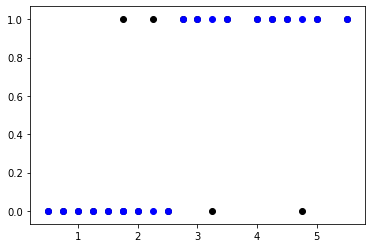

In [11]:
### Test cell 

theta = np.array([[5., 5.]])

# set stopping criterion
loss_stop_threshold = 0.0001

# learning rate
alpha = .2


optimal_theta, losses = gradient_descent(X, y, theta, alpha, loss_stop_threshold)
y_pred_mine = predict(optimal_theta, X)

# predictions
print('Predictions: \n', y_pred_mine)

# The coefficients
print('Theta: \n', optimal_theta)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred_mine))

# Plot outputs    
plt.scatter(X, y,  color='black')
plt.scatter(X, y_pred_mine, color='blue')

251


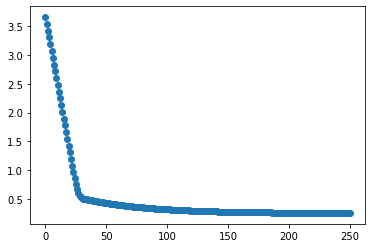

In [12]:
# Plot loss per iteration 

iterations = list(range(0, len(losses)))
print(len(iterations))
plt.scatter(iterations, losses)

In [13]:
# Confusion matrix analysis 

from sklearn import metrics

CM = metrics.confusion_matrix(y, y_pred_mine)

print(CM)
print("accuracy: %.2f" % metrics.accuracy_score(y, y_pred_mine))

# calculate precision and recall (and f-score, a weighted average of precision and recall) 
precision,recall,fscore,_ = metrics.precision_recall_fscore_support(y, y_pred_mine)
for c in np.unique(y):
        print("class %s, precision: %.2f, recall: %.2f,  f-score: %.2f" % (c, precision[c], recall[c], fscore[c]))

[[8 2]
 [2 8]]
accuracy: 0.80
class 0, precision: 0.80, recall: 0.80,  f-score: 0.80
class 1, precision: 0.80, recall: 0.80,  f-score: 0.80


[0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1]
Theta: 
 [-1.14380478] [[0.50611753]]
Mean squared error: 0.25


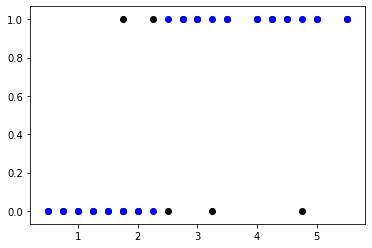

In [14]:
# Scikit-learn as a Basis for comparison 

# create a logisitic regression model
logreg = linear_model.LogisticRegression(solver='liblinear',multi_class='auto')

logreg.fit(X, y)

# predictions
y_pred = logreg.predict(X)
print(y_pred)

# The coefficients
print('Theta: \n', logreg.intercept_, logreg.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))

# Plot outputs
plt.scatter(X, y,  color='black')
plt.scatter(X, y_pred, color='blue')

In [15]:
from sklearn import metrics

CM = metrics.confusion_matrix(y, y_pred)

print(CM)
print("accuracy: %.2f" % metrics.accuracy_score(y, y_pred))

# calculate precision and recall (and f-score, a weighted average of precision and recall) 
precision,recall,fscore,_ = metrics.precision_recall_fscore_support(y, y_pred)
for c in np.unique(y):
        print("class %s, precision: %.2f, recall: %.2f,  f-score: %.2f" % (c, precision[c], recall[c], fscore[c]))

[[7 3]
 [2 8]]
accuracy: 0.75
class 0, precision: 0.78, recall: 0.70,  f-score: 0.74
class 1, precision: 0.73, recall: 0.80,  f-score: 0.76


## Report

The main entry point to my solution is the gradient_descent() function. This function uses the batch gradient descent technique to calculate optimized theta values for a logistic hypothesis function. The function is an appropriate model for a binary classification problem. Given theta values, predict() will assign target values to each data sample in X based on a logistic hypothesis function parameterized on theta that is determined by calling h_log(). 

The function gradient_descent() relies on functions gradient_batch() and loss(). The loss() function in turn relies on the cost() function because to find the cost for one data sample in X. The loss() function then returns the average cost by summing all costs and dividing my the number of samples. The cost() function calculates cost using cross entropy, which ensures convergence to a global minimum. It relies on h_log() to calculate the cost for a given data sample. The gradient_descent() function calcualtes new theta values based on old theta values, a learning rate, and a gradient determined in gradient_batch() until the loss (calculated by loss() ) of using the new theta values in a hypothesis function is less than a given threshold. 

The gradient_batch() function depends on h_log() to calculate the gradient for a given theta_j. The gradient is calculated by summing for all samples the differences between h_log() probability and real target values multiplied by the sample's predictor value for feature j. 

The hypothesis function h_log() only depends on inner(). The losgistic hypothesis function h_theta(x) can be thought of as g(theta.transpose * x), where g(x) is the sigmoid function. Thus in my implementation, g(x) corresponds to the function h_log(), and the input to g(x) is calculated in the function inner(). Note: because of the data structures I use in my implementation, inner() does not explicitly use the transpose of theta, but the return value is equivalent to the dot product of theta transpose and x. 

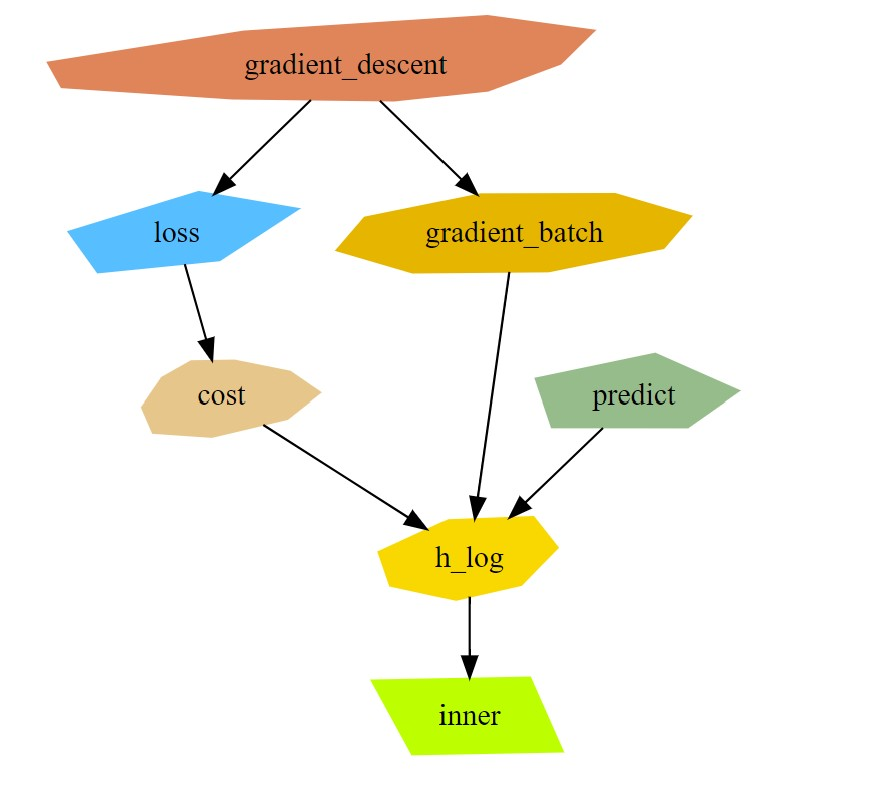

In [16]:
# Vizualization of dependencies 

from IPython.core.display import Image
Image('logistic regression dependency graph.jpg')

## Question 1

### After how many iterations, and for which learning rate (α) did your algorithm converge? 
Using a learning rate of 0.2, my algorithm converged after 251 iterations. 

## Question 2

### What happens if α is too large? How does this affect the loss function?

If the learning rate is too large, then when it is multiplied by the gradient it 'skips' over the global minimum of the loss. In my example above, the gradient descent algorithm still converged because I set the loss threshold higher, but if I hadn't essentially forced the algorithm to stop, it would run infinitely, because the aplha value would cause divergence. 

Example: 

Predictions: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Theta: 
 [[-1.7349539   0.09788114]]
Mean squared error: 0.50


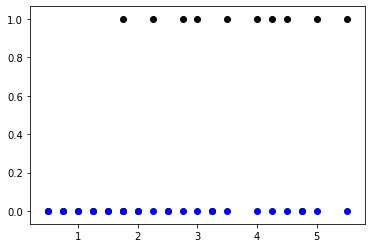

In [17]:
# Test with higher learning rate 

# set stopping criterion
loss_stop_threshold = 0.008

# learning rate
alpha = 2


optimal_theta, losses = gradient_descent(X, y, theta, alpha, loss_stop_threshold)
y_pred_mine = predict(optimal_theta, X)

# predictions
print('Predictions: \n', y_pred_mine)

# The coefficients
print('Theta: \n', optimal_theta)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred_mine))

# Plot outputs    
plt.scatter(X, y,  color='black')
plt.scatter(X, y_pred_mine, color='blue')

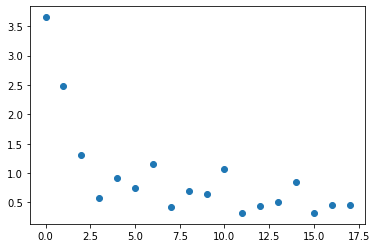

In [18]:
# Plot loss per iteration 

iterations = list(range(0, len(losses)))
plt.scatter(iterations, losses)

## Question 3

### Assume that you are applying logistic regression to the iris (flower) dataset, as in the previous assignment. Answer the following questions: 

#### How would your hypothesis function change in this case and why? 

My hypothesis function would not have to change. This is because I would use the one-vs-all method for multi-class classification, which transforms the classification probelm itself into a series of binary classification problems, and thus the hypothesis function I've built would not have to change. I would have to change the predict function, however, because the way I've implemented it, it only considers one hypothesis function to make its prediction. In a multi-class problem on the other hand, the predict function will evaluate a hypothesis function for each class, compare probabilities, and assign the class that corresponds to the highest probability. It would no longer be a simple comparison to 0.5. I would also need to create a wrapper for gradient_descent() that takes a value of how many unique classes there are, and then create and return a list of that many optimized thetas by dividing X into that many binary classification problems. 

#### How would you utilize your implementation of logistic regression in order to perform (multi-class) classification on the iris dataset? 

Using the one-vs-all method, I would create four binary classification problems out of the four iris types. For each unique iris type, I would create an alternate set of training target sets that sets any target in the original set to 1 if it is the iris type and 0 if it is any other iris type. I would then run gradient descent once for each new set of target values and obtain 4 sets of optimzed parameters. This set of optimized parameters would allow me to classify a sample by finding the max probability accross all hypothesis functions. 

Psuedocode : 
